In [2]:
#### 5.4.Cor.merged.V8.CV2500.cor.Scaled2s_Robust_test.rmN.R
### 1.Loading data
Cor.merged.V8.CV2500.scaled.Twice.dataset <- readRDS("/data8t_4/JH/MyJobs/COAD_NormalCancer_Project/5_My_method_evaluation/Cor.merged.V8.CV2500.scaled.Twice.dataset.rds")
Trans.Rang1.CV2500.Normalized <- Cor.merged.V8.CV2500.scaled.Twice.dataset$Trans.Rang1.CV2500.Normalized
COAD.pheno <- Cor.merged.V8.CV2500.scaled.Twice.dataset$COAD.pheno
NTcluster <- COAD.pheno$sampleTypes
NTcluster <- as.numeric(NTcluster)

### 2.Remove scReference corelation
dim(Trans.Rang1.CV2500.Normalized)
cellTypesName <- rownames(Trans.Rang1.CV2500.Normalized)


[1]  39 329

In [13]:

### 3.remove N items
rmN.list <-  list()
# x was remove how many reference cell types
for(x in 1:37){
  # x=10
  ### generate 50 smaple sets
  #cx <- list()
  ## generate sampling m times N samples
  m = 50
  cx <- lapply(1:m, function(j){
    #print(j)
    sample(cellTypesName, x)
  })
  ## remove 2 items
  si.average <- list()
  for(i in 1:m ){
    # i=1
    rmCellTypes <- cx[[i]]
    # remove cellTypes
    Trans.Rang1.CV2500.Normalized_sub <- Trans.Rang1.CV2500.Normalized[!rownames(Trans.Rang1.CV2500.Normalized) %in% rmCellTypes,]
    Trans.Rang1.CV2500.Normalized_sub.dist <- dist(t(Trans.Rang1.CV2500.Normalized_sub), method="euclidean")
    require("cluster")
    sil.merge <- silhouette(NTcluster, Trans.Rang1.CV2500.Normalized_sub.dist)
    si.average[[i]] <- summary(sil.merge)$clus.avg.widths
    #COAD.pheno_sub <- as.data.frame(COAD.pheno[,c("sampleTypes","msi")])
    #pheatmap::pheatmap(Trans.Rang1.CV2500.Normalized_sub, 
    #                   annotation_col = COAD.pheno_sub,
    #                   cluster_rows = F)
  }
  si.average.tb <- do.call(rbind,si.average)
  si.average.tb <- as.data.frame(si.average.tb)
  si.average.tb$rmNum <- rep(x,length(cx))
  rmN.list[[x]] <- si.average.tb
  
}


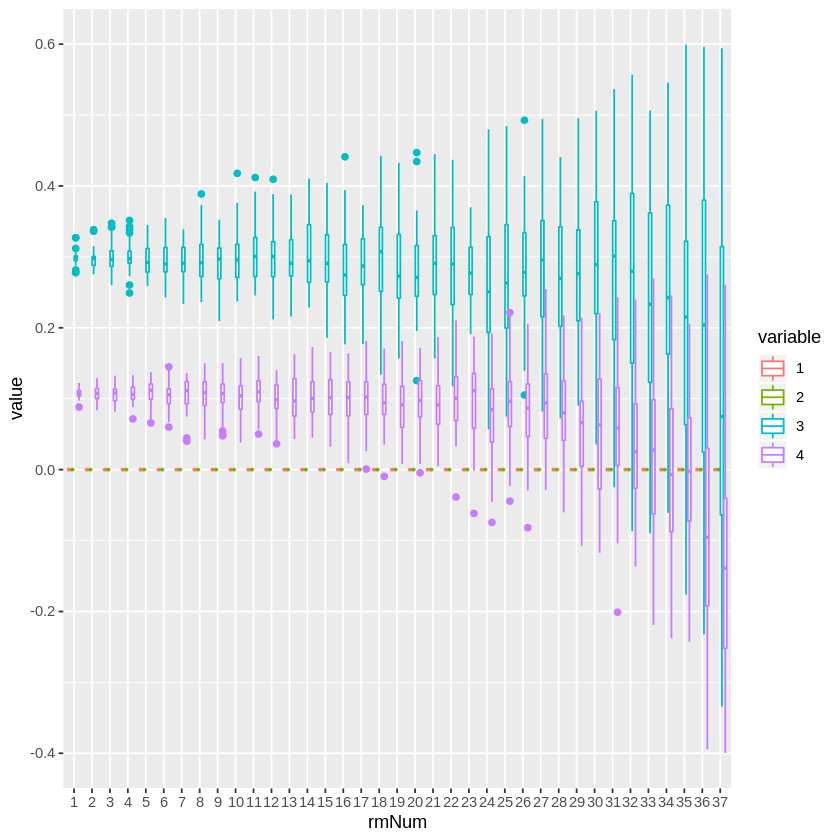

In [10]:
si.average.rmN.table <- do.call(rbind,rmN.list)
### plot ggplot
library(ggplot2)
library(reshape2)
plotData <- melt(si.average.rmN.table,id.vars = 5)
#ggplot(si.average.rmN.table) 
plotData$rmNum <- as.factor(plotData$rmNum)
ggplot(plotData) + geom_boxplot(aes(x=rmNum, y=value, color=variable))


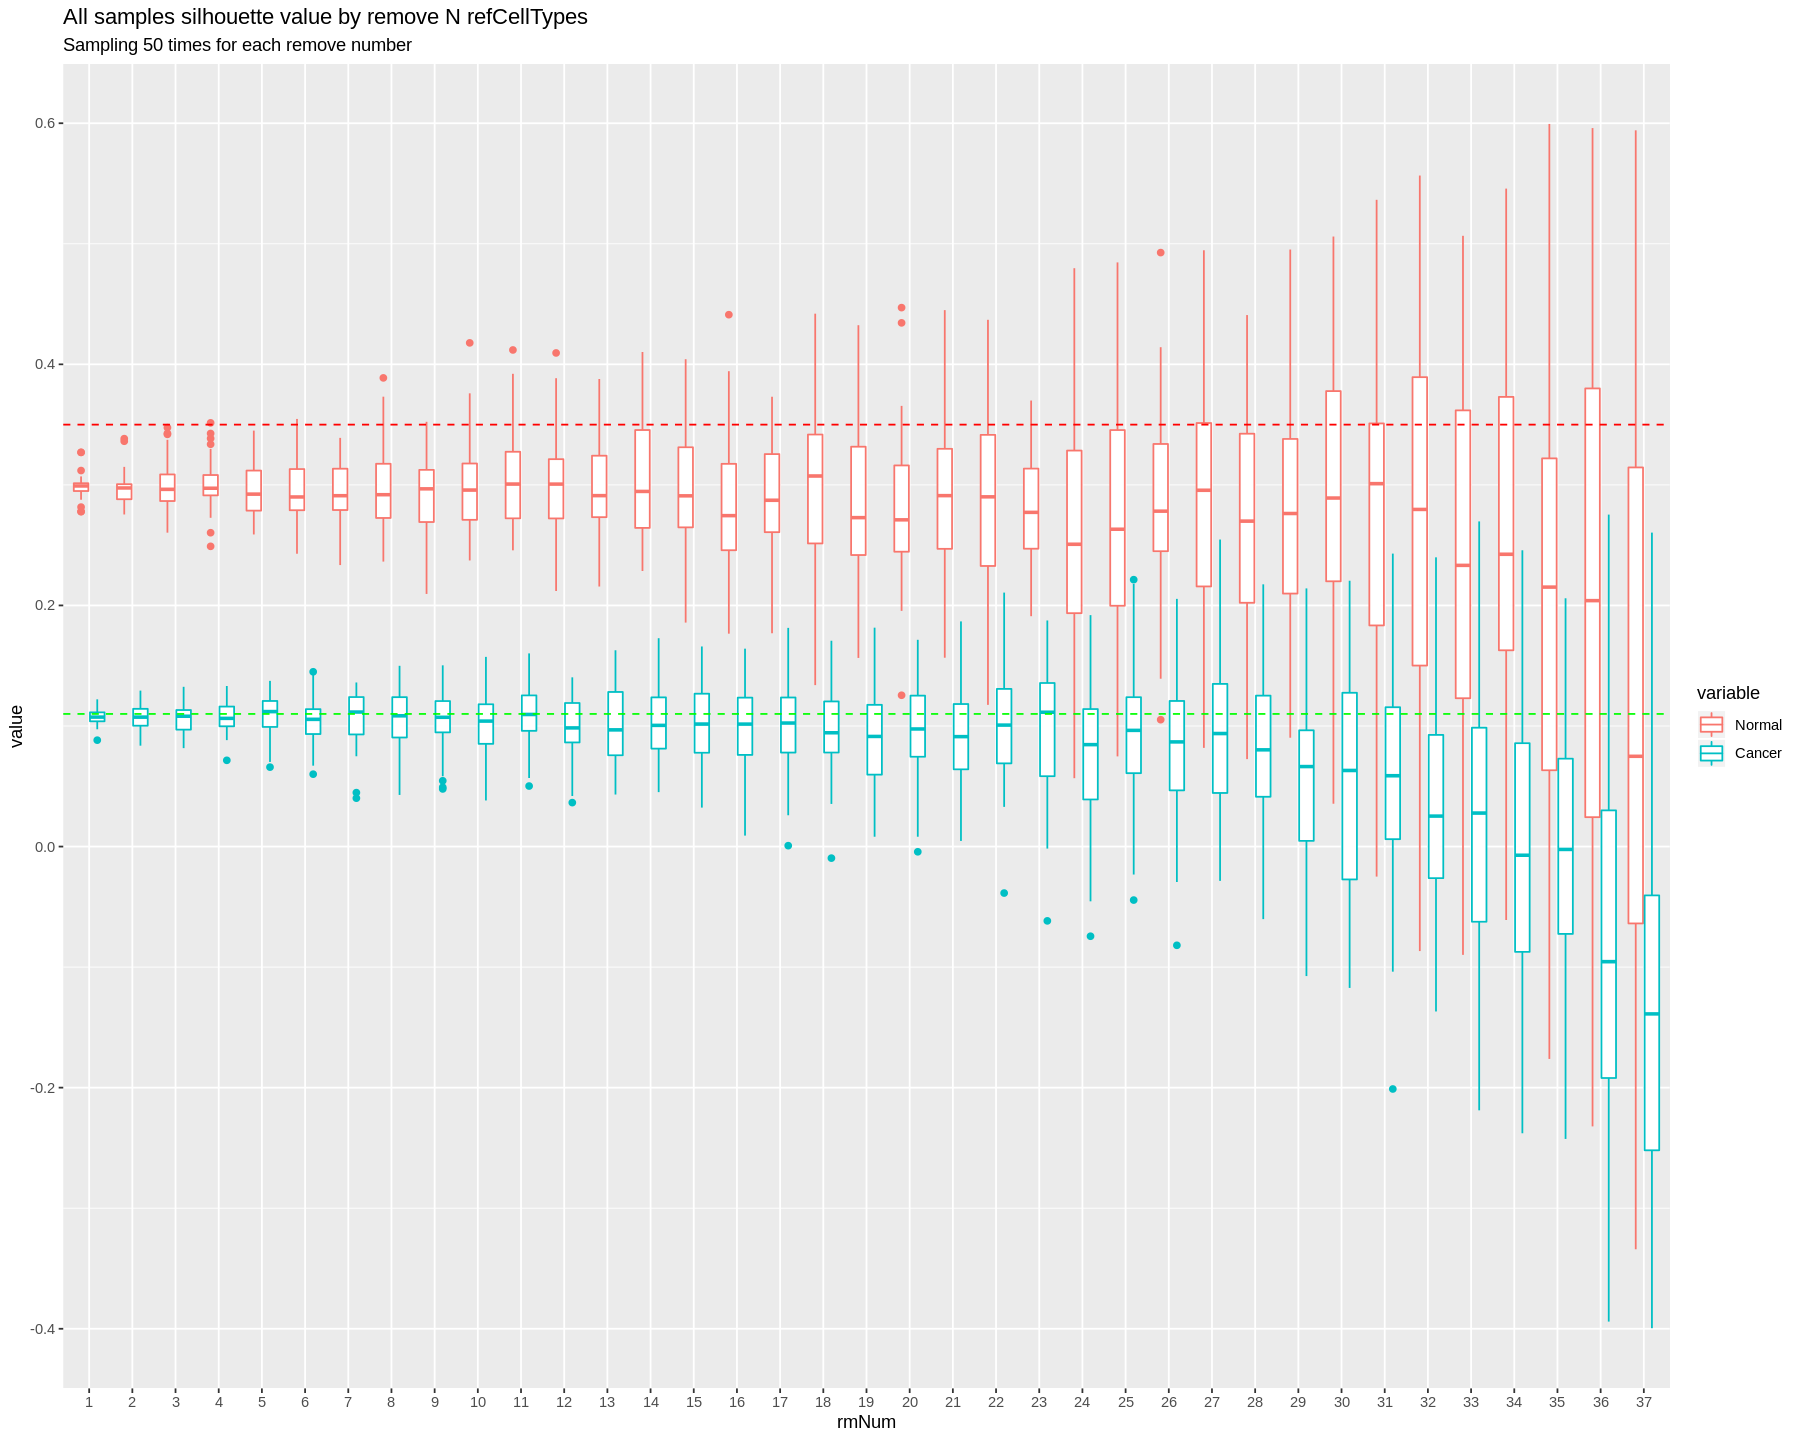

In [17]:
### Clean plot 
si.average.rmN.table.clean <- si.average.rmN.table[,-c(1:2)]
colnames(si.average.rmN.table.clean) <- c("Normal", "Cancer","rmNum")
plotData.clean <- melt(si.average.rmN.table.clean,id.vars = 3)
plotData.clean$rmNum <- as.factor(plotData.clean$rmNum)
options(repr.plot.width=15, repr.plot.height=12)
ggplot(plotData.clean) + geom_boxplot(aes(x=rmNum, y=value, color=variable))+
  labs(title = "All samples silhouette value by remove N refCellTypes",subtitle = paste("Sampling", m, "times for each remove number")) +
  geom_hline(yintercept=0.35, linetype="dashed", color = "red")+
  geom_hline(yintercept=0.11, linetype="dashed", color = "green")
